# Convection-Diffusion 

In [25]:
from sympde.core     import Constant
from sympde.topology import dx
from sympde.topology import ScalarFunctionSpace
from sympde.topology import Line
from sympde.topology import element_of
from sympde.expr     import BilinearForm
from sympde.expr     import integral

from gelato          import GltExpr
from psydac.api.discretization      import discretize
from scipy.linalg import eig as eig_solver
import matplotlib.pyplot as plt

In [18]:
# abstract model
domain = Line()

V = ScalarFunctionSpace('V', domain)

u = element_of(V, name='u')
v = element_of(V, name='v')

alpha = Constant('alpha', real=True)
beta = Constant('beta', real=True)

expr = beta*dx(v)*dx(u) + alpha*dx(u)*v
a = BilinearForm((v,u), integral(domain, expr))

glt_a = GltExpr(a)

In [19]:
# define numer of cells
ne    = 64

# spline degree
degree = 3

# Peclet number
# [0.1, 0.25, 0.9, 5]
Pe = 0.25

alpha = 1.
h     = 1./ne
beta  = alpha * h / (2. * Pe)

In [20]:
# create the computational domain from a topological domain
domain_h = discretize(domain, ncells=[ne])

# discrete spaces
Vh = discretize(V, domain_h, degree=[degree])

# dsicretize the equation using Dirichlet bc
ah = discretize(a, domain_h, [Vh, Vh])

# dsicretize the glt symbol
glt_ah = discretize(glt_a, domain_h, [Vh, Vh])

In [21]:
# approximate the eigenvalues using the GLT symbol
eigh = glt_ah.eig(alpha=alpha, beta=beta)
eigh_r = eigh.real
eigh_i = eigh.imag

In [23]:
# compute eigenvalues using LAPACK eigenvalue solver
M = ah.assemble(alpha=alpha, beta=beta).tosparse().todense()
w, v = eig_solver(M)
eig_r = w.real
eig_i = w.imag

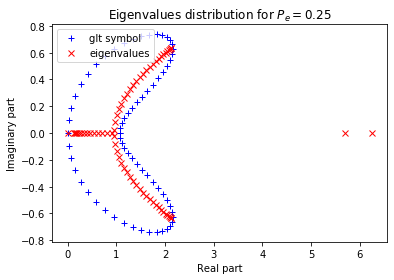

In [27]:
title = 'Eigenvalues distribution for $P_e = {Pe}$'

plt.plot(eigh_r, eigh_i, "+b", label="glt symbol")
plt.plot(eig_r, eig_i, "xr", label="eigenvalues")
plt.legend(loc=2);

plt.title(title.format(Pe=Pe))
plt.xlabel('Real part')
plt.ylabel('Imaginary part');